

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.





## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [4]:
!git clone https://github.com/haya60/signs_data.git

Cloning into 'signs_data'...
remote: Enumerating objects: 39257, done.
remote: Total 39257 (delta 0), reused 0 (delta 0), pack-reused 39257 (from 1)
Receiving objects: 100% (39257/39257), 226.20 MiB | 16.33 MiB/s, done.
Updating files: 100% (39210/39210), done.


## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
import shutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split


dataset_dir = '/content/signs_data/Traffic_Signs/Dataset'
categories = ['0', '1' , '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
              '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']


base_dir = '/content/signs_data/Traffic_Signs/split_data'
os.makedirs(base_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(base_dir, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'val', category), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'test', category), exist_ok=True)


def split_data(category):
    category_dir = os.path.join(dataset_dir, category)
    images = os.listdir(category_dir)

    train_imgs, test_imgs = train_test_split(images, test_size=0.30, random_state=42)
    val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.50, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(category_dir, img), os.path.join(base_dir, 'train', category, img))
    for img in val_imgs:
        shutil.copy(os.path.join(category_dir, img), os.path.join(base_dir, 'val', category, img))
    for img in test_imgs:
        shutil.copy(os.path.join(category_dir, img), os.path.join(base_dir, 'test', category, img))

for category in categories:
    split_data(category)

print("Data successfully split into train, validation, and test sets.")


Data successfully split into train, validation, and test sets.


## Data Preprocessing


In [6]:
train_dir = '/content/signs_data/Traffic_Signs/split_data/train'
test_dir = '/content/signs_data/Traffic_Signs/split_data/test'
valid_dir = '/content/signs_data/Traffic_Signs/split_data/val'

img_size = (150, 150)
batch_size = 128

# train
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# valid
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)




X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_valid, y_valid = next(valid_generator)

Found 27446 images belonging to 43 classes.
Found 5891 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.


## Building the CNN Model


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(254, (3, 3), padding='same', activation='relu'),
    Conv2D(254, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model


In [6]:
history = model.fit(train_generator , batch_size=150, epochs=20, validation_data=valid_generator, verbose=2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 - 140s - 650ms/step - accuracy: 0.2893 - loss: 2.4912 - val_accuracy: 0.5715 - val_loss: 1.2618
Epoch 2/20
215/215 - 56s - 260ms/step - accuracy: 0.8415 - loss: 0.4995 - val_accuracy: 0.9465 - val_loss: 0.1805
Epoch 3/20
215/215 - 56s - 259ms/step - accuracy: 0.9702 - loss: 0.1001 - val_accuracy: 0.9772 - val_loss: 0.0836
Epoch 4/20
215/215 - 56s - 258ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9867 - val_loss: 0.0606
Epoch 5/20
215/215 - 57s - 264ms/step - accuracy: 0.9906 - loss: 0.0323 - val_accuracy: 0.9847 - val_loss: 0.0628
Epoch 6/20
215/215 - 55s - 256ms/step - accuracy: 0.9925 - loss: 0.0262 - val_accuracy: 0.9787 - val_loss: 0.0776
Epoch 7/20
215/215 - 82s - 383ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9891 - val_loss: 0.0423
Epoch 8/20
215/215 - 82s - 382ms/step - accuracy: 0.9951 - loss: 0.0168 - val_accuracy: 0.9889 - val_loss: 0.0574
Epoch 9/20
215/215 - 56s - 260ms/step - accuracy: 0.9961 - loss: 0.0150 - val_accuracy: 0.9777 - v

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [7]:
model.evaluate(valid_generator)

46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9876 - loss: 0.0660


[0.07449578493833542, 0.9870572090148926]

In [10]:
model.evaluate(test_generator)

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.9865 - loss: 0.0612


[0.07376133650541306, 0.9865897297859192]

In [9]:
model.evaluate(train_generator)

215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 160ms/step - accuracy: 0.9946 - loss: 0.0188


[0.02007986791431904, 0.9940974712371826]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [1]:
!git clone https://github.com/haya60/test_data.git

Cloning into 'test_data'...
remote: Enumerating objects: 12636, done.
remote: Counting objects: 100% (12636/12636), done.
remote: Compressing objects: 100% (12634/12634), done.
remote: Total 12636 (delta 0), reused 12636 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12636/12636), 72.97 MiB | 16.62 MiB/s, done.
Updating files: 100% (12632/12632), done.


In [10]:
# test_dir = '/content/test_data/Test_Dataset/Dataset/00000.png'

# img_size = (150, 150)


# # test
# test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# test_generator = test_datagen.flow(
#     test_dir,
#     # target_size=img_size,
# )




In [ ]:
model.predict(X_test, y_test)

## Model Performance Visualization


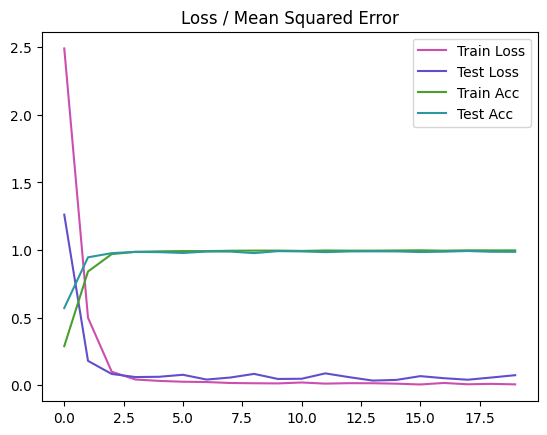

In [11]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='Train Loss', color='#cc4eb1')
plt.plot(history.history['val_loss'], label='Test Loss', color='#614ecc')
plt.plot(history.history['accuracy'], label='Train Acc', color='#47a02c')
plt.plot(history.history['val_accuracy'], label='Test Acc', color='#2c97a0')
plt.legend()
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [12]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
- Resize to unify all image sizes to the same size, and scale to simplify the image.


2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
- My model consists of CNN layers followed by max pooling layers, then flat density layers, each layer tries to extract the most important features and pass them to the next layer.

3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?


4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?

- For the number of epochs, I chose it randomly and it showed good results, Adam optimizer is the best compared to other types, the type of optimizer you choose may cause the model not to reach the local minimum, some types of optimizers fail in some models, so you need to try different types



5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
- it is a classification problem with multi class, so sparse_categorical_crossentropy is the appropriate one


6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.

- i did not use them
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
- Accuracy is the most relevant metric for classification tasks, with Model producing a high accuracy of 98% on the test and valid set, witch means it generalize well on unsean data


8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?

- the visualization displayed that there is no overfitting, and the accuracy is high
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
- there is no overfitting